<a href="https://colab.research.google.com/github/MarioROT/IHLT-MAI/blob/main/Session4_MarioRosas_AlamLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 4 (Part of Speech) - IHLT

**Students:**
- Mario Rosas
- Alam Lopez

**Lab Professor:** Salvador Medina Herrera

## Paraphrases Template

In [1]:
%%shell
git clone https://github.com/mariorot/IHLT-MAI.git
cd 'IHLT-MAI'
mv 'complementary_material' /content/
mv scripts /content/

pip install python-crfsuite

Cloning into 'IHLT-MAI'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 167 (delta 87), reused 81 (delta 27), pack-reused 0
Receiving objects: 100% (167/167), 179.69 KiB | 1.55 MiB/s, done.
Resolving deltas: 100% (87/87), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 12.0 MB/s eta 0:00:00


In [1]:
from scripts.models import StatisticalModels

## TODO
1. Consider Treebank corpus.
  - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.
  - Evaluate the resulting 24 models using sentences from 3001.

2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).
  - Which model would you select? Justify the answer.

The code for the tokenization is at: https://github.com/MarioROT/IHLT-MAI/blob/main/scripts/text_preprocessing.py

The code for jaccard distance computation is at: https://github.com/MarioROT/IHLT-MAI/blob/main/scripts/compute_metrics.py

In [2]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [3]:
data = nltk.corpus.treebank.tagged_sents()
train = nltk.corpus.treebank.tagged_sents()[:3000]
test = nltk.corpus.treebank.tagged_sents()[3000:]

In [4]:
sm = StatisticalModels(data, [3000], 3000, ['HMM', 'TnT', 'PER', 'CRF'])

In [5]:
sm.do()

  0%|          | 0/100 [03:11<?, ?it/s]

3000


({'HMM': [24.180975198745728],
  'TnT': [91.31848526000977],
  'PER': [21.955272912979126],
  'CRF': [53.18442440032959]},
 {'HMM': [0.368], 'TnT': [0.876], 'PER': [0.959], 'CRF': [0.947]})

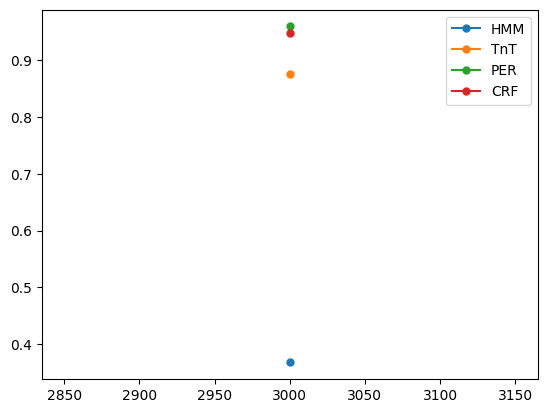

      HMM     TnT     PER     CRF  Sentences
0  24.181  91.318  21.955  53.184       3000


In [6]:
sm.results()

In [ ]:
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
HMM = trainer.train_supervised(train)
HMM.accuracy(test)

0.36844377293330455

In [ ]:
len(set(test).difference(train))

TypeError: ignored

In [ ]:
def LID(fd, bins):
  return nltk.probability.LidstoneProbDist(fd, 0.1, bins)
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
HMM = trainer.train_supervised(train, estimator=LID)
HMM.accuracy(test)

0.8984243470753291

In [6]:
HMM = nltk.HiddenMarkovModelTagger.train(train)
HMM.accuracy(test)

0.8984243470753291

In [ ]:
import dill
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/models/hmmTagger.dill', 'wb') as f:
    dill.dump(HMM, f)

In [ ]:
TnT = nltk.tag.tnt.TnT()
TnT.train(train_data)
TnT.accuracy(test_data)

In [ ]:
TnT.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

In [ ]:
PER = nltk.tag.perceptron.PerceptronTagger(load=False)
PER.train(train_data)
PER.accuracy(test_data)

In [ ]:
PER.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

In [ ]:
!pip install python-crfsuite
CRF = nltk.tag.CRFTagger()
CRF.train(train_data,'crf_tagger_model')
CRF.accuracy(test_data)

In [ ]:
CRF.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

# Conclusion

In this lab session excercise, we compared sentence pairs using Jaccard distance with and without lemmatization and data cleaning.

- **Which is better: words or lemmas?**
  - It can be seen that on average the lemmas outperformed the words in 3 out of 4 scenarios by 2-5%.
  
 -  The only case in which the words were better was with the raw/uncleaned pair of sentences with the NLTK tokenizer, but only by 0.2%.
  
  - Thus, in general, lemmas work better with either NLTK or spaCy lemmatization, and this makes sense because we have the root of the words, and the similarity will be higher, instead of possible variations where the similarity will be lower.


- **Do you think that could perform better for any pair of texts?**

  - Even when we are going to have exceptions with some sentences, in the majority of the cases the performance will be better because we increase the number of words in common between the compared sets.


SpaCy's lemmatization generally outperformed NLTK, indicating that it might be more effective in capturing the semantic similarity between words, leading to improved sentence comparison results.

Data cleaning including lowercase conversion, punctuation removal, and stopword removal, helped in all cases to improve performance. Both NLTK and spaCy lemmatization processes benefited from data cleaning, resulting in several cases in lower Jaccard distance values, indicating a better measure of similarity.

